# About the project
The end goal of this project is to classify patients with high protein concentration in urine and the healthy group based on SERS (Surface Enchanced Raman Spectroscopy) spectral data and biomedical data.  
This project is to be released as a research paper later in 2022 or 2023. Some information might not be fully shown here as a result.

The project is divided into several Jupyter notebooks with the following names:
1) Import raw urine spectra (part 1)
2) Spectra processing (part 2)
3) Classification of patients (part 3)
4) Biomedical data (part 4)
5) Comparison of nanoparticles (part 5)

Author of all codes: Sultan Aitekenov, sultanaitekenov@gmail.com

Part of the upcoming abstract:
Excessive protein excretion in human urine is an early and sensitive marker of diabetic nephropathy, primary and secondary renal disease. Kidney problems, particularly chronic kidney disease, remain among the few growing causes of mortality in the world. Therefore, it is important to develop efficient, expressive, and low-cost method for protein determination. Surface enhanced Raman spectroscopy (SERS) methods are potential candidates to achieve those criteria. In this paper, the SERS methods was developed to distinguish patients with proteinuria and the healthy group. Commercial gold nanoparticles with the diameter of 60 nm and 100 nm, and silver nanoparticles with the diameter of 100 nm were employed. Silver, gold, silicon and test slides covered with aluminium tape were utilized as substrates. Obtained spectra were analysed with several machine learning algorithms coupled with the PCA, ROC curve, and cross-validation methods. 

# Biomedical data (part 4)

## About
The information below contains various summary data derived from biomedical 24h urine data that we used for SERS studies. Missing values, typos, conversions to the same units were addressed. Most of patients’ data are available for Raman spectra acquisition, however, a few samples might not be available, and most importantly every sample contains information about protein concentration in mg/L.

## Import data
Data was processed in Libre Office prior to putting here. The things that got addressed: white spaces, rows with None, translations, dates.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

bio_data = pd.read_csv('urine biomedicals.csv')
bio_data

,code,status,patient_ID,"volume, L/day",sex,date of birth,date collection,"Sodium, mmole/day","Protein, gramm/day","Potassium, mmole/L","Creatinine, mmole/day","Urea, mmole/L","Uric acid, mmole/L"
0,ASA 5791,diseased,139,4.84,F,04.01.1975,25.07.2022,445.2,3.51,132.10,10.80,330.08,4.30
1,TM 5991,diseased,75,3.42,M,17.04.1995,15.11.2021,321.4,0.36,31.10,8.43,295.80,2.31
2,AS 6891,diseased,44,3.40,M,17.05.1986,26.03.2021,479.4,0.78,69.02,18.98,476.60,3.71
3,AD 4891,diseased,132,3.38,M,02.08.1984,18.07.2022,378.5,2.41,71.60,14.58,500.50,4.37
4,TM 5991,diseased,20,3.28,M,17.04.1995,09.11.2020,387.0,0.62,51.40,16.30,359.40,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,SM 5891,healthy,92,0.54,F,07.11.1985,27.12.2021,185.0,0.11,61.50,6.17,149.90,2.11
114,AN 8891,healthy,89,0.52,F,19.10.1988,27.12.2021,119.0,0.04,71.70,4.56,133.30,2.01
115,DA7891,diseased,18,0.50,M,23.09.1987,01.10.2020,25.5,10.00,31.50,11.74,345.50,2.65
116,KAA 7991,diseased,121,0.46,F,12.05.1997,01.06.2022,139.0,1.29,45.50,5.97,106.95,1.18


In [2]:
bio_data.isnull().sum()

code                     0
status                   0
patient_ID               0
volume, L/day            0
sex                      0
date of birth            0
date collection          0
Sodium, mmole/day        0
Protein, gramm/day       0
Potassium, mmole/L       0
Creatinine, mmole/day    2
Urea, mmole/L            0
Uric acid, mmole/L       1
dtype: int64

## Convert all columns to the same measurements

In [3]:
bio_data['Protein, mg/L'] = bio_data['Protein, gramm/day']*1000 / bio_data['volume, L/day']
bio_data['Sodium, mmole/L'] = bio_data['Sodium, mmole/day'] / bio_data['volume, L/day']
bio_data['Creatinine, mmole/L'] = bio_data['Creatinine, mmole/day'] / bio_data['volume, L/day']

In [4]:
bio_data = bio_data.drop(['code', 'Protein, gramm/day', 'Sodium, mmole/day', 'Creatinine, mmole/day'], axis=1)
bio_data

,status,patient_ID,"volume, L/day",sex,date of birth,date collection,"Potassium, mmole/L","Urea, mmole/L","Uric acid, mmole/L","Protein, mg/L","Sodium, mmole/L","Creatinine, mmole/L"
0,diseased,139,4.84,F,04.01.1975,25.07.2022,132.10,330.08,4.30,725.206612,91.983471,2.231405
1,diseased,75,3.42,M,17.04.1995,15.11.2021,31.10,295.80,2.31,105.263158,93.976608,2.464912
2,diseased,44,3.40,M,17.05.1986,26.03.2021,69.02,476.60,3.71,229.411765,141.000000,5.582353
3,diseased,132,3.38,M,02.08.1984,18.07.2022,71.60,500.50,4.37,713.017751,111.982249,4.313609
4,diseased,20,3.28,M,17.04.1995,09.11.2020,51.40,359.40,NaN,189.024390,117.987805,4.969512
...,...,...,...,...,...,...,...,...,...,...,...,...
113,healthy,92,0.54,F,07.11.1985,27.12.2021,61.50,149.90,2.11,203.703704,342.592593,11.425926
114,healthy,89,0.52,F,19.10.1988,27.12.2021,71.70,133.30,2.01,76.923077,228.846154,8.769231
115,diseased,18,0.50,M,23.09.1987,01.10.2020,31.50,345.50,2.65,20000.000000,51.000000,23.480000
116,diseased,121,0.46,F,12.05.1997,01.06.2022,45.50,106.95,1.18,2804.347826,302.173913,12.978261


In [5]:
%%capture
# supress all output including warnings

# create an empty list fill out later
list_date_birth = [None]*len(bio_data['date of birth'])
# create current timestamp to calculate age of each patient
now = pd.Timestamp('now')

# create a list containing ages for all patients
for i in range( len(bio_data['date of birth']) ):
    then = pd.Timestamp(bio_data['date of birth'][i])
    list_date_birth[i] = len(pd.date_range(then,now,freq='Y'))

# convert the list to pd.dataframe
bio_data['age'] = list_date_birth

In [6]:
bio_data = bio_data.drop(['date of birth', 'date collection'], axis=1)
bio_data

,status,patient_ID,"volume, L/day",sex,"Potassium, mmole/L","Urea, mmole/L","Uric acid, mmole/L","Protein, mg/L","Sodium, mmole/L","Creatinine, mmole/L",age
0,diseased,139,4.84,F,132.10,330.08,4.30,725.206612,91.983471,2.231405,47
1,diseased,75,3.42,M,31.10,295.80,2.31,105.263158,93.976608,2.464912,27
2,diseased,44,3.40,M,69.02,476.60,3.71,229.411765,141.000000,5.582353,36
3,diseased,132,3.38,M,71.60,500.50,4.37,713.017751,111.982249,4.313609,38
4,diseased,20,3.28,M,51.40,359.40,NaN,189.024390,117.987805,4.969512,27
...,...,...,...,...,...,...,...,...,...,...,...
113,healthy,92,0.54,F,61.50,149.90,2.11,203.703704,342.592593,11.425926,37
114,healthy,89,0.52,F,71.70,133.30,2.01,76.923077,228.846154,8.769231,34
115,diseased,18,0.50,M,31.50,345.50,2.65,20000.000000,51.000000,23.480000,35
116,diseased,121,0.46,F,45.50,106.95,1.18,2804.347826,302.173913,12.978261,25


# Explore data

## Descriptive statistics

In [7]:
bio_data.describe()

,patient_ID,"volume, L/day","Potassium, mmole/L","Urea, mmole/L","Uric acid, mmole/L","Protein, mg/L","Sodium, mmole/L","Creatinine, mmole/L",age
count,118.000000,118.000000,118.000000,118.000000,117.000000,118.000000,118.000000,116.000000,118.000000
mean,70.008475,1.684492,48.037203,286.543475,2.686410,1402.655321,121.618996,7.085557,40.025424
std,41.932077,0.766558,22.488046,131.015706,1.266605,2668.379547,80.275454,4.131069,11.272432
min,1.000000,0.380000,1.870000,54.300000,0.010000,40.000000,25.000000,0.713287,19.000000
25%,32.250000,1.180000,33.025000,212.425000,1.930000,97.348244,78.212778,4.601865,34.000000
50%,71.500000,1.540000,45.100000,276.100000,2.600000,368.029030,103.484127,6.353571,38.000000
75%,106.750000,2.100000,62.950000,354.800000,3.350000,1378.317503,145.250000,8.814213,47.000000
max,139.000000,4.840000,136.800000,959.400000,8.980000,20000.000000,710.526316,23.815789,70.000000


## Age

The histogram below shows patients' age distribution. Total number of patients equals to 118. Most of them are available for Raman spectra acquisition, however, a few samples might not be available. Every sample contains information about protein concentration in mg/L.

In [8]:
# count total number of patients
total_count = bio_data['age'].count()
total_count

118

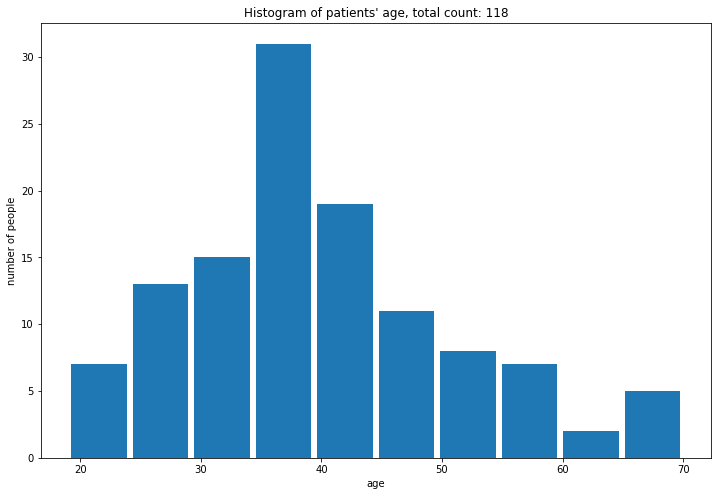

In [9]:
bio_data.hist(column='age', bins=10, rwidth=0.9, figsize=[12,8], grid=False, legend=False)
plt.xlabel('age')
plt.ylabel('number of people')
plt.title(f"Histogram of patients' age, total count: {total_count}");

## Correlation matrix

Uric acid and urea have high correlation (0.84). Potassium has correlation to urea and uric acid, in both cases 0.61. Volume is negatively correlated to creatinine -0.58. Protein has some correlation to creatinine 0.34, but no other meaningful correlations. Age is not correlated with anything.

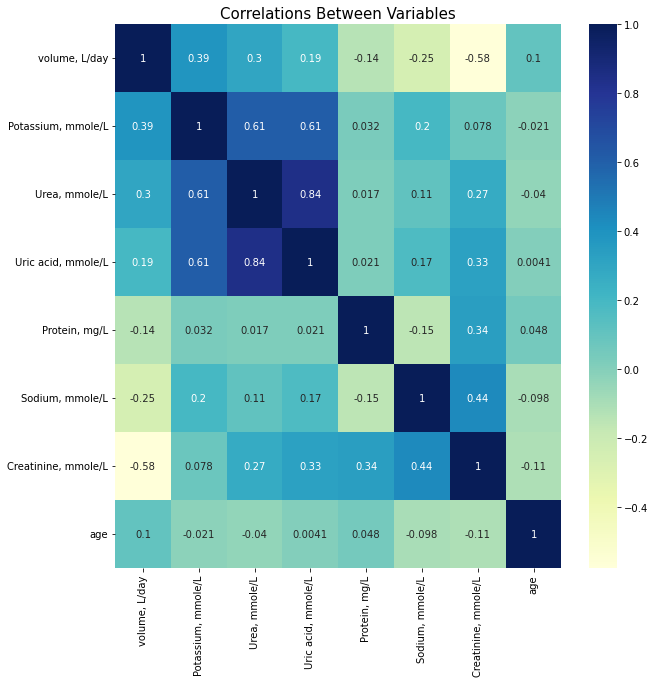

In [10]:
# visualize correlations, also just for this plot drop 'patient_ID'
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(bio_data.drop('patient_ID', axis=1).corr(), cmap="YlGnBu", annot=True)
plt.title("Correlations Between Variables", size=15)
plt.show()

## Gender

Our samples have roughly half women and men.

In [11]:
bio_data['sex'].unique()

array(['F', 'M'], dtype=object)

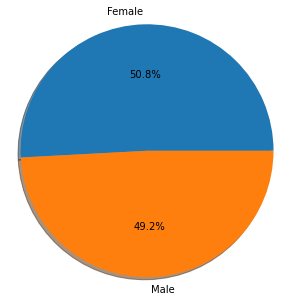

In [12]:
no_f = bio_data['sex'].value_counts()['F']
no_m = bio_data['sex'].value_counts()['M']

plt.figure(figsize=[5,5])
plt.pie([no_f, no_m], labels=['Female', 'Male'], autopct='%1.1f%%', shadow=True)
plt.axis('equal');

# Classification
In the 'status' column patients are divided into two groups 'diseased' and 'healthy'. These statuses were given by doctors. They considered not only the biomedical data of 24h urine but also patients' overall health condition. Thus, not all information related to the categorization is listed here. However, in the code below tries to use ML algorithms to make a prediction about the status of a patient. Despite limitations of data, it is possible to classify a patient with 90% accuracy as shown in the end.
Classical machine learning algorithms were successful in determining a patient's status with only 24h urine data. Stratified cross validation method with 10 folds is used to avoid overfitting. 

In [13]:
# check how many unique values for status
bio_data['status'].unique()

array(['diseased', 'healthy'], dtype=object)

In [14]:
bio_data_classifier = bio_data

## Prepare data for classification

### Prepare target variable

In [15]:
# prepare target variable
y = [None] * len(bio_data_classifier['status'])

In [16]:
for i in range( len(bio_data_classifier['status']) ):
    if bio_data_classifier['status'].iloc[i] == 'diseased':
        y[i] = 1
    elif bio_data_classifier['status'].iloc[i] == 'healthy':
        y[i] = 0

### Prepare independent vaiable

In [17]:
# prepare independent variables X
X = [None] * len(bio_data_classifier['status'])
X = bio_data_classifier[ ['Potassium, mmole/L',
                          'Urea, mmole/L',
                          'Uric acid, mmole/L',
                          'Protein, mg/L',
                          'Sodium, mmole/L',
                          'Creatinine, mmole/L'] ]

# modify X to fill nans with mean values
X['Uric acid, mmole/L'].fillna(X['Uric acid, mmole/L'].mean(), inplace=True)
X['Creatinine, mmole/L'].fillna(X['Creatinine, mmole/L'].mean(), inplace=True)
X.isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_11624\4086572763.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Uric acid, mmole/L'].fillna(X['Uric acid, mmole/L'].mean(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11624\4086572763.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Creatinine, mmole/L'].fillna(X['Creatinine, mmole/L'].mean(), inplace=True)


Potassium, mmole/L     0
Urea, mmole/L          0
Uric acid, mmole/L     0
Protein, mg/L          0
Sodium, mmole/L        0
Creatinine, mmole/L    0
dtype: int64

### Run estimator

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

models = [KNeighborsClassifier(n_neighbors=13), LinearDiscriminantAnalysis(), GaussianNB(), LogisticRegression(solver='liblinear')]
for model in models:
    scores = cross_val_score(model, X, y, cv=10)
    print(f'{model} mean score {round(scores.mean(),2)}, score std {round(scores.std(),3)}')


KNeighborsClassifier(n_neighbors=13) mean score 0.89, score std 0.101
LinearDiscriminantAnalysis() mean score 0.77, score std 0.113
GaussianNB() mean score 0.79, score std 0.109
LogisticRegression(solver='liblinear') mean score 0.9, score std 0.115


# Save to csv

In [19]:
bio_data.to_csv('urine biomedicals processed.csv')